In [62]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Line fitting the matrix way
This in-class exercise walks you through the following steps to fit a line to several datasets:
1. Create the datasets.
2. Construct design matrices.
3. Compute the weights using matrix inversion.
4. Plot the data and the fitted line.

## Linear (line) models

---
**Task 1 (easy): Identifying parameters👩‍💻**
1. Run the cell below to load the neccessary libraries and to construct the datasets.

2. Identify the inputs and the labels of each dataset. 



---

In [63]:
import numpy as np
import matplotlib.pyplot as plt

dataset_1 = np.array([[10, 2], [9, 6]])
dataset_2 = np.array([[5, 1], [7, 5]])
dataset_3 = np.array([[4, 2], [5, 3]])
# The first columns is the inputs and the second is the labels


---
**Task 2 (easy): Identifying parameters and constructing the design matrix👩‍💻**
1. Complete the `separate_inputs_labels`
 function below. The function should take a dataset as input and return the inputs and labels separated into separate variables. The function should return a matrix `X`
 containing the inputs and an array `y`
 containing the labels. Use the function to obtain the inputs and labels for each dataset.


**Hint**
Slicing might be helpful here.

2. Complete the code below and construct the design matrix for the other datasets. Print your results.


---

In [64]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X (numpy array): The input matrix.
    y (numpy array): The labels array.
    """
    
    ...
    # return the results as a tuple
    return np.array([[item] for item in dataset[:,0]]), dataset[:,1]

def create_linear_design_matrix(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

X1, y1 = separate_inputs_labels(dataset_1)
X2, y2 = separate_inputs_labels(dataset_2)
X3, y3 = separate_inputs_labels(dataset_3)

# construct the design matrix    
X1_design = create_linear_design_matrix(X1)
X2_design = create_linear_design_matrix(X2)
X3_design = create_linear_design_matrix(X3)

# Print the datasets
print("X1 = \n",X1)
print("y1 =", y1)
print("Design Matrix for Dataset 1:\n", X1_design)

X1 = 
 [[10]
 [ 9]]
y1 = [2 6]
Design Matrix for Dataset 1:
 [[10.  1.]
 [ 9.  1.]]



---
**Task 3 (easy): Solve for model parameters👩‍💻**
1. Find the inverse of the design matrix for each dataset constructed above.
2. Calculate the model weights, then print your results.
3. Use the `plot_model`
 function to plot your results.
4. Visually inspect the plots and interpret the meaning and influence of each term.


---

Weights for Dataset 1: [-4. 42.]


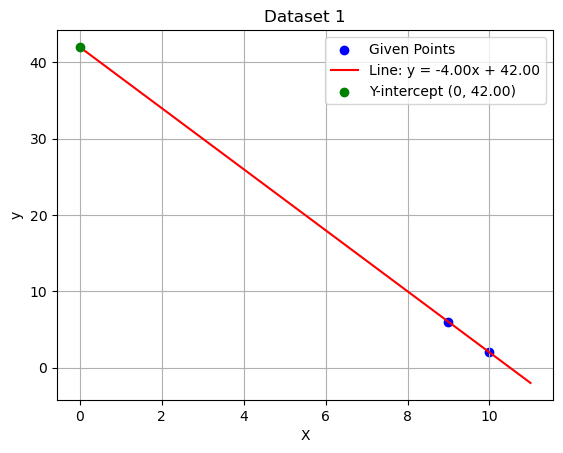

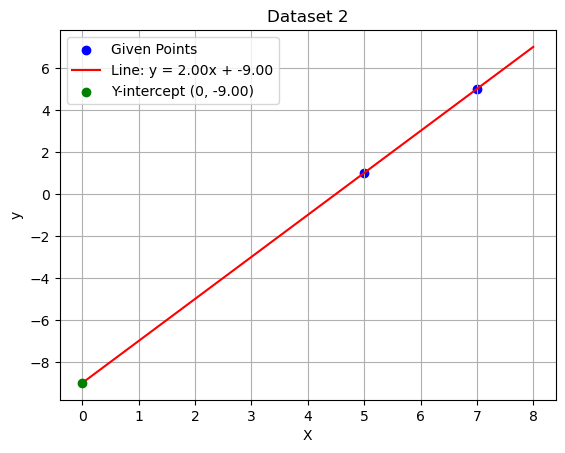

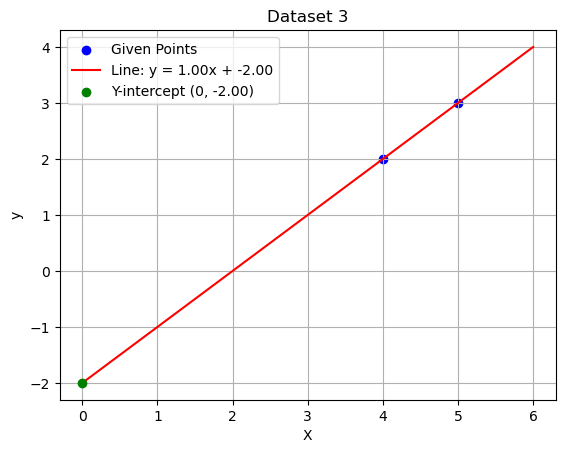

In [65]:
weights1 = np.linalg.solve(X1_design, y1)
weights2 = np.linalg.solve(X2_design, y2)
weights3 = np.linalg.solve(X3_design, y3)

print("Weights for Dataset 1:", weights1)

# Function to plot data points and fitted line
def plot_model(X, y, wieghts, dataset_name):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct y-intercept visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = wieghts[0] * x_vals + wieghts[1]
    
    # Plot the fitted line
    plt.plot(x_vals, y_vals, color='red', label=f'Line: y = {wieghts[0]:.2f}x + {wieghts[1]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, wieghts[1], color='green', zorder=5, label=f'Y-intercept (0, {wieghts[1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_model(X1, y1, weights1, 'Dataset 1')
plot_model(X2, y2, weights2, 'Dataset 2')
plot_model(X3, y3, weights3, 'Dataset 3')

If you have more time, complete the next task.

---
**Task 4 (easy): A new dataset👩‍💻♾️💡**
Run the cell below to define a new dataset.
1. Identify the inputs and the labels, then reuse the code from previous tasks to construct a design matrix.
2. Calculate the inverse of the design matrix. This step should result in an error. What are the possible reasons for getting this error?

**Note:** For pedagogical reasons, next week we will return to this dataset, as you will have the necessary tools to fit a model for this scenario.


---

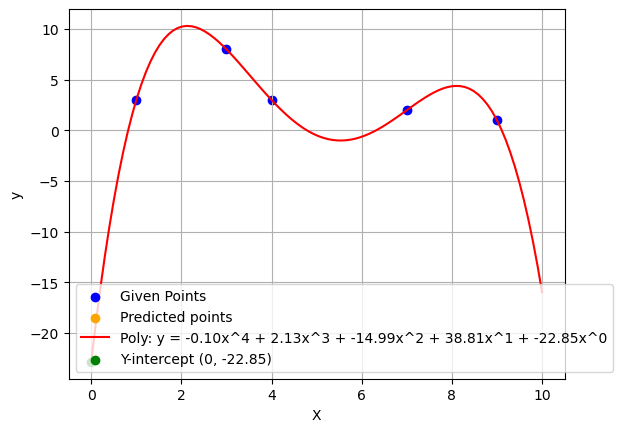

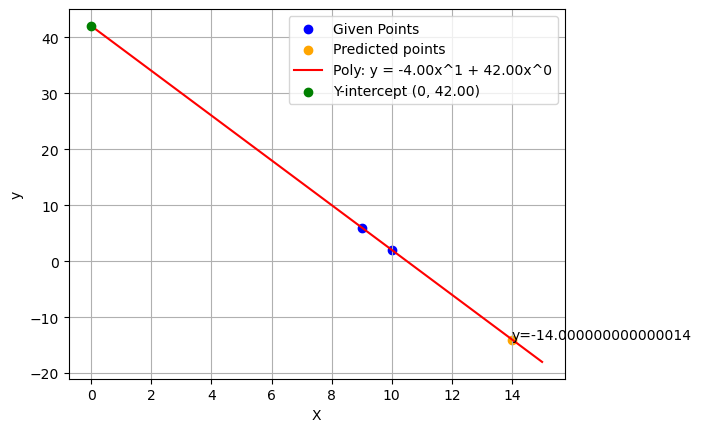

In [80]:
dataset_4 = np.array([[9, 1], [7, 2],[3, 8], [1, 3],[4, 3]])

X4, y4 = separate_inputs_labels(dataset_4)
def create_design_matrix(X):
    x_len = X.shape[0]
    return np.hstack([*[X**i for i in range(x_len-1, 0, -1)], np.ones((X.shape[0], 1))])
X4_design = create_design_matrix(X4)
weights4 = np.linalg.solve(X4_design, y4)

def gen_plot_model(X, y, weights, x_predict_y=[], dataset_name=""):
    weights_len = len(weights)

    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    X=np.append(X, [[x] for x in x_predict_y])

    def predict(x):
        return sum([weight*x**(weights_len - idx-1)  for (idx, weight) in enumerate(weights)])
    
    x_pred = [x for x in x_predict_y]
    y_pred = [predict(x) for x in x_predict_y]

    plt.scatter(x_pred, y_pred, color='orange', label='Predicted points')

    for (i, j) in zip(x_pred, y_pred):
        plt.text(i, j, f'y={j}')
    
    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = predict(x_vals)
    
   
    label = " + ".join([f'{weight:.2f}x^{weights_len-idx-1}'  for (idx, weight) in enumerate(weights)])
    # Plot the fitted polynomial
    plt.plot(
    x_vals, 
    y_vals, 
    color='red', 
    label=(
        f'Poly: y = {label}'
    ))
   
    # Plot the y-intercept
    plt.scatter(0, weights[-1], color='green', zorder=5, label=f'Y-intercept (0, {weights[-1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    #plt.xlim([-0.25, max(X) + 1])  # Ensure the x-axis starts from 0
    plt.show()



gen_plot_model(X4, y4, weights4)

gen_plot_model(X1, y1, weights1, [14])